In [2]:
# A Linear regression is  a way of predctive analysis . It explains the relationship between two or more variables.
# Simple Linear regression has  One dependent variable and one independent variable
# So we have a data plotted and we want a best fit line that explains the relationship between independent and dependent variable

In [3]:
# Best fit line describes most accurate value of y based on x . i.e the error difference between the predicted and actual values is
# the least using Sum of square of all errors (∑error^2)

In [23]:
# Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear
# method for regression. Linear regression finds the parameters w and b that minimize
# the mean squared error between predictions and the true regression targets, y,
# on the training set.

In [24]:
#  So linear regression finds the parameter of the line w and b that finds the  best fits that  minimizes the SSE between
# prediction and true target or actual values

In [25]:
# Other important metric is R² measures, “How much the change in output variable (y) is explained by the change in input variable(x).


In [49]:
import sklearn
import mglearn
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train)

In [9]:
# The attributes are as below

In [10]:
lr.coef_ #Weights or coefficients stored in coef_ attribute. This can be a numpy array with one entry per input feature

array([ 0.39390555])

In [11]:
lr.intercept_ #offset or intercept stored here . this will always be a single number

-0.031804343026759746

In [12]:
lr.predict(X_test)

array([-0.3283204 , -0.84483835, -0.49358667,  0.35230624, -0.71167167,
        0.19957573,  1.02910669,  0.07859229,  0.75390167, -0.75032857,
       -0.47681266,  1.07802761, -0.8104986 ,  0.2013684 ,  1.00692209])

In [13]:
lr.score(X_test,y_test)

0.65933685968637001

In [14]:
lr.score(X_train,y_train)

0.67008903150757559

In [15]:
# Not good R^2. sign of underfitting as the accuracy is near about for training and testung dataset

In [16]:
# ?? How to resolve underfitting-include more parameters

In [17]:
# In high dimension dataset there is more chance of overfitting , so lets go for Boston dataset

In [18]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression().fit(X_train,y_train)

In [19]:
lr.score(X_train,y_train)

0.94477334580744021

In [20]:
lr.score(X_test,y_test)

0.79120622729186585

In [21]:
# Clear sign of overfitting , so we have to penalize and control model complexity so we go for ridge regression. not able to generalize

# Ridge regression

In [26]:
# Ridge regression is also a linear model for regression, so the formula it uses to make
# predictions is the same one used for ordinary least squares. In ridge regression,
# though, the coefficients (w) are chosen not only so that they predict well on the training
# data, but also to fit an additional constraint. We also want the magnitude of coefficients
# to be as small as possible; in other words, all entries of w should be close to
# zero. Intuitively, this means each feature should have as little effect on the outcome as
# possible (which translates to having a small slope), while still predicting well. This
# constraint is an example of what is called regularization. Regularization means explicitly
# restricting a model to avoid overfitting.

In [96]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))
ridge.coef_[1]

0.870375195897
0.814099803185


-1.4185195557769201

In [30]:
# Ridge is a more restricted model, so we are
# less likely to overfit. A less complex model means worse performance on the training
# set, but better generalization.

In [31]:
# In the previous example, we used the default parameter alpha=1.0.  The optimum setting of alpha depends on the particular dataset we are using.
# Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.

In [94]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))
ridge01.coef_[1]

0.917735903166
0.824025240419


-4.5485735624058359

In [93]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))
ridge10.coef_[1]

0.767049882547
0.727757351199


0.37421357681029832

In [34]:
# In overfitting the algorithm over learns from the training dataset hence couldnt generalize to the test data set . 
# So using Regularization we are able to penalize the weights and decrease them so that it learns a linear function instead of 
# a complicated function.Z depends on w and since w is small z is small so in case of logistic regression  . the output of z
# will be in a linear regime and its easy to learn an identity function.

In [67]:
import numpy as np

# list(range(1,11,0.01))

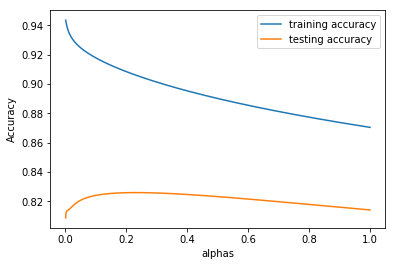

In [90]:
trn_accuracy=[]
tst_accuracy=[]
alphas=list(np.linspace(0.001,1,10000))
for alpha in alphas:
    ridge10 = Ridge(alpha=alpha).fit(X_train, y_train)
    trn_accuracy.append(ridge10.score(X_train,y_train))
    tst_accuracy.append(ridge10.score(X_test,y_test))
plt.plot(alphas,trn_accuracy,label='training accuracy')
plt.plot(alphas,tst_accuracy,label='testing accuracy')
plt.xlabel("alphas")
plt.ylabel("Accuracy")
plt.legend()

In [79]:
#  the alpha parameter changes the
# model by inspecting the coef_ attribute of models with different values of alpha. A
# higher alpha means a more restricted model, so we expect the entries of coef_ to
# have smaller magnitude for a high value of alpha than for a low value of alpha.

In [95]:
# Here we can clearly observe that as the value of alpha increases, the model complexity reduces.
# Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (eg. alpha = 5). 
# Thus alpha should be chosen wisely. A widely accept technique is cross-validation,
# i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

In [97]:
# In practice, ridge regression is usually the first choice between these two models.
# However, if you have a large amount of features and expect only a few of them to be
# important, Lasso might be a better choice. Similarly, if you would like to have a
# model that is easy to interpret, Lasso will provide a model that is easier to understand,
# as it will select only a subset of the input features. scikit-learn also provides
# the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice,
# this combination works best, though at the price of having two parameters to adjust:
# one for the L1 regularization, and one for the L2 regularization.

In [98]:
# R^2 vs adjusted R^2